# Test Extrusion

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd() / '..'/ 'src'))
from LoopExtrusion import (Extrusion_kinetics, Loop_Extruders)
from Topology import TopologyGenerator

In [303]:
generator = TopologyGenerator()
generator.gen_top([60], chain_names=['P'])
# generator.print_top()

In [304]:
lef = Loop_Extruders(name='smc',num_LE=20, topology=generator.topology,
                     k_off=0.01, k_hop=0.1, kstep_LE=1.0,
                     tau=1e2)
print("3D hopping", lef.hop3D)
print("Preferential loading", lef.preferential_LE_loading)
print("Temperature", lef.temp)
# lef.update_immobile_blockers(boundaries)
lef.unbind_at_end = True
lef.set_up()

2025-05-29 21:57:59,991 | INFO | LoopExtrusion | Initializing the Loop Extruder class ... 
2025-05-29 21:57:59,992 | INFO | LoopExtrusion | Output directory: output
2025-05-29 21:57:59,993 | INFO | LoopExtrusion | Number of extruders: 20
2025-05-29 21:57:59,993 | INFO | LoopExtrusion | Random seed: 35877275
2025-05-29 21:57:59,993 | INFO | LoopExtrusion | k_step: 1.0 | k_off: 0.01 | k_hop : 0.1
2025-05-29 21:57:59,994 | INFO | LoopExtrusion | v_LE: 5.0 | temp: 0.0 | persistent time: 100.0 | max hop length: 5
2025-05-29 21:57:59,994 | INFO | LoopExtrusion | Unbind at ends: True
2025-05-29 21:57:59,995 | INFO | LoopExtrusion | Chain topology: [(0, 59)]
2025-05-29 21:57:59,995 | INFO | LoopExtrusion | Randomly distributing the LEFs ... 
2025-05-29 21:57:59,997 | INFO | LoopExtrusion | Set up complete.


3D hopping False
Preferential loading 0.0
Temperature 0.0


In [305]:
sim1D = Extrusion_kinetics(lef, verbose=True)

2025-05-29 21:58:01,411 | INFO | LoopExtrusion | Extrusion kinetcis using the same random number seed as LEF


In [334]:
sim1D.simulate_step()
# lef.anchor_loc_dict

2025-05-29 21:59:04,890 | INFO | LoopExtrusion | Time: 1.41732    |  LE6   move_right_anchor    | dx_left: 0.00     | dx_right: 0.70    
2025-05-29 21:59:04,894 | INFO | LoopExtrusion | LE6 Stepped right
2025-05-29 21:59:04,903 | INFO | LoopExtrusion |   LE6    IS at  (    9.00,   11.26) | left blocked by ( LE13  , None  ) | right blocked by ( None  ,  LE9  )
2025-05-29 21:59:04,906 | INFO | LoopExtrusion |   LE6    WAS at (    9.00,   10.57) | left blocked by ( LE13  ,  LE6  ) | right blocked by (  LE6  , None  )
2025-05-29 21:59:04,908 | INFO | LoopExtrusion | --------------------


In [9]:
bool(0.0)

False

In [8]:
sim1D.get_next_event()

{'LE_id': 1,
 'move_left_anchor': False,
 'move_right_anchor': True,
 'unbind': False,
 'hop_left': False,
 'hop_right': False}

In [13]:
from pathlib import Path
import os
SRC=os.path.join(Path.cwd().parent, 'src')
import sys
sys.path.append(SRC)
from Topology import TopologyGenerator
from ChromatinDynamics import ChromatinDynamics
import openmm.unit as unit
import numpy as np
from LoopExtrusion import Loop_Extruders, Extrusion_kinetics
from Reporters import save_pdb
import h5py
import types

In [3]:
generator = TopologyGenerator()
generator.gen_top([100, 400, 500])


In [4]:
for chain in generator.topology.chains():
    for atom in chain.atoms():
        print(chain.id, atom.id)

C1 0
C1 1
C1 2
C1 3
C1 4
C1 5
C1 6
C1 7
C1 8
C1 9
C1 10
C1 11
C1 12
C1 13
C1 14
C1 15
C1 16
C1 17
C1 18
C1 19
C1 20
C1 21
C1 22
C1 23
C1 24
C1 25
C1 26
C1 27
C1 28
C1 29
C1 30
C1 31
C1 32
C1 33
C1 34
C1 35
C1 36
C1 37
C1 38
C1 39
C1 40
C1 41
C1 42
C1 43
C1 44
C1 45
C1 46
C1 47
C1 48
C1 49
C1 50
C1 51
C1 52
C1 53
C1 54
C1 55
C1 56
C1 57
C1 58
C1 59
C1 60
C1 61
C1 62
C1 63
C1 64
C1 65
C1 66
C1 67
C1 68
C1 69
C1 70
C1 71
C1 72
C1 73
C1 74
C1 75
C1 76
C1 77
C1 78
C1 79
C1 80
C1 81
C1 82
C1 83
C1 84
C1 85
C1 86
C1 87
C1 88
C1 89
C1 90
C1 91
C1 92
C1 93
C1 94
C1 95
C1 96
C1 97
C1 98
C1 99
C2 100
C2 101
C2 102
C2 103
C2 104
C2 105
C2 106
C2 107
C2 108
C2 109
C2 110
C2 111
C2 112
C2 113
C2 114
C2 115
C2 116
C2 117
C2 118
C2 119
C2 120
C2 121
C2 122
C2 123
C2 124
C2 125
C2 126
C2 127
C2 128
C2 129
C2 130
C2 131
C2 132
C2 133
C2 134
C2 135
C2 136
C2 137
C2 138
C2 139
C2 140
C2 141
C2 142
C2 143
C2 144
C2 145
C2 146
C2 147
C2 148
C2 149
C2 150
C2 151
C2 152
C2 153
C2 154
C2 155
C2 156
C2 157
C2 1

In [5]:
for chain in generator.topology.chains():
    print(list(chain.atoms())[0].id, type(list(chain.atoms())[-1].id))

0 <class 'str'>
100 <class 'str'>
500 <class 'str'>


In [17]:
sim3D = ChromatinDynamics(generator.topology, 'LE', output_dir=f'{Path.cwd()}/output', console_stream=True, platform_name="OpenCL")

2025-05-16 19:42:13,843 | INFO | ChromatinDynamics | ************************************************************
2025-05-16 19:42:13,843 | INFO | ChromatinDynamics |                      Chromatin Dynamics                     
2025-05-16 19:42:13,844 | INFO | ChromatinDynamics | ************************************************************
2025-05-16 19:42:13,845 | INFO | ChromatinDynamics | System initialized with 1000 particles. Output directory: /Users/sb95/Library/CloudStorage/Box-Box/Research_current/ChromatinDynamics/notebooks/output
2025-05-16 19:42:13,845 | INFO | Platforms | Platform 'OpenCL' is available and selected.
2025-05-16 19:42:13,845 | INFO | ChromatinDynamics | force_field_manager initialized. Use this to add forces before running setup.


In [18]:
sim3D.force_field_manager.add_harmonic_bonds()
# sim.force_field_manager.removeCOM()
sim3D.force_field_manager.add_self_avoidance()
sim3D.force_field_manager.addLEFBonds([(0,1)])

2025-05-16 19:42:15,739 | INFO | Forcefield | Adding 997 harmonic bonds with r0=1.0, k=10.0, group=0
2025-05-16 19:42:15,740 | INFO | Forcefield | HarmonicBonds force successfully added to system.
2025-05-16 19:42:15,740 | INFO | Forcefield | --------------------------------------------------
2025-05-16 19:42:15,741 | INFO | Forcefield | Adding Self-avoidance force with parameters:
2025-05-16 19:42:15,742 | INFO | Forcefield | Ecut=4.0, k_rep=5.0, r_rep=1.0, cutoff=5.0, group=2
2025-05-16 19:42:15,743 | INFO | Forcefield | Added exclusions from bonded monomers.
2025-05-16 19:42:15,744 | INFO | Forcefield | SelfAvoidance force successfully added to system.
2025-05-16 19:42:15,744 | INFO | Forcefield | --------------------------------------------------
2025-05-16 19:42:15,745 | INFO | Forcefield | Adding 1 unique LEF bonds with r0=1.0, k=10.0, group=31
2025-05-16 19:42:15,745 | INFO | Forcefield | LEFBonds force successfully added to system.
2025-05-16 19:42:15,746 | INFO | Forcefield | 

In [19]:
sim3D.simulation_setup(init_struct='randomwalk',save_pos=True, save_energy=True)

2025-05-16 19:42:16,867 | INFO | Integrators | Valid integrators: ['langevin', 'brownian', 'active-brownian']| Selected: langevin
2025-05-16 19:42:16,868 | INFO | Integrators | LangevinIntegrator: temperatute=120.0 | friction=0.1 | timestep=0.01
2025-05-16 19:42:16,891 | INFO | ChromatinDynamics | Setting up simulation context...
2025-05-16 19:42:16,893 | INFO | Utilities | Random walk created. Position shape: (1000, 3)
2025-05-16 19:42:16,895 | INFO | ChromatinDynamics | Simulation context initialized.
2025-05-16 19:42:16,896 | INFO | ChromatinDynamics | ------------------------------------------------------------------------------------------------------------------------
2025-05-16 19:42:16,897 | INFO | ChromatinDynamics | Index  Force Class                    Force Name           Group    Particles    Bonds        Exclusions   P.E./Particle       
2025-05-16 19:42:16,897 | INFO | ChromatinDynamics | -----------------------------------------------------------------------------------

In [20]:
sim3D.run(50_000)
save_pdb(sim3D)

2025-05-16 19:42:18,870 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:42:18,872 | INFO | ChromatinDynamics | Running simulation for 50000 steps...
2025-05-16 19:42:25,440 | INFO | ChromatinDynamics | Completed 50000 steps in 6.57s (7613 steps/s)
2025-05-16 19:42:25,440 | INFO | ChromatinDynamics | ------------------------------------------------------------


In [17]:
with h5py.File("/Users/sb95/Library/CloudStorage/Box-Box/Research_current/ChromatinDynamics/notebooks/output/LE_positions.cndb", 'r') as f:
    print(f.keys())
    
    pos = np.array(f['90'])
pos.shape

<KeysViewHDF5 ['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']>


(1000, 3)

In [5]:
int(-1.4), int(-1.9)

(-1, -1)

In [13]:
save_pdb(sim3D)

In [10]:
import matplotlib.pyplot as plt


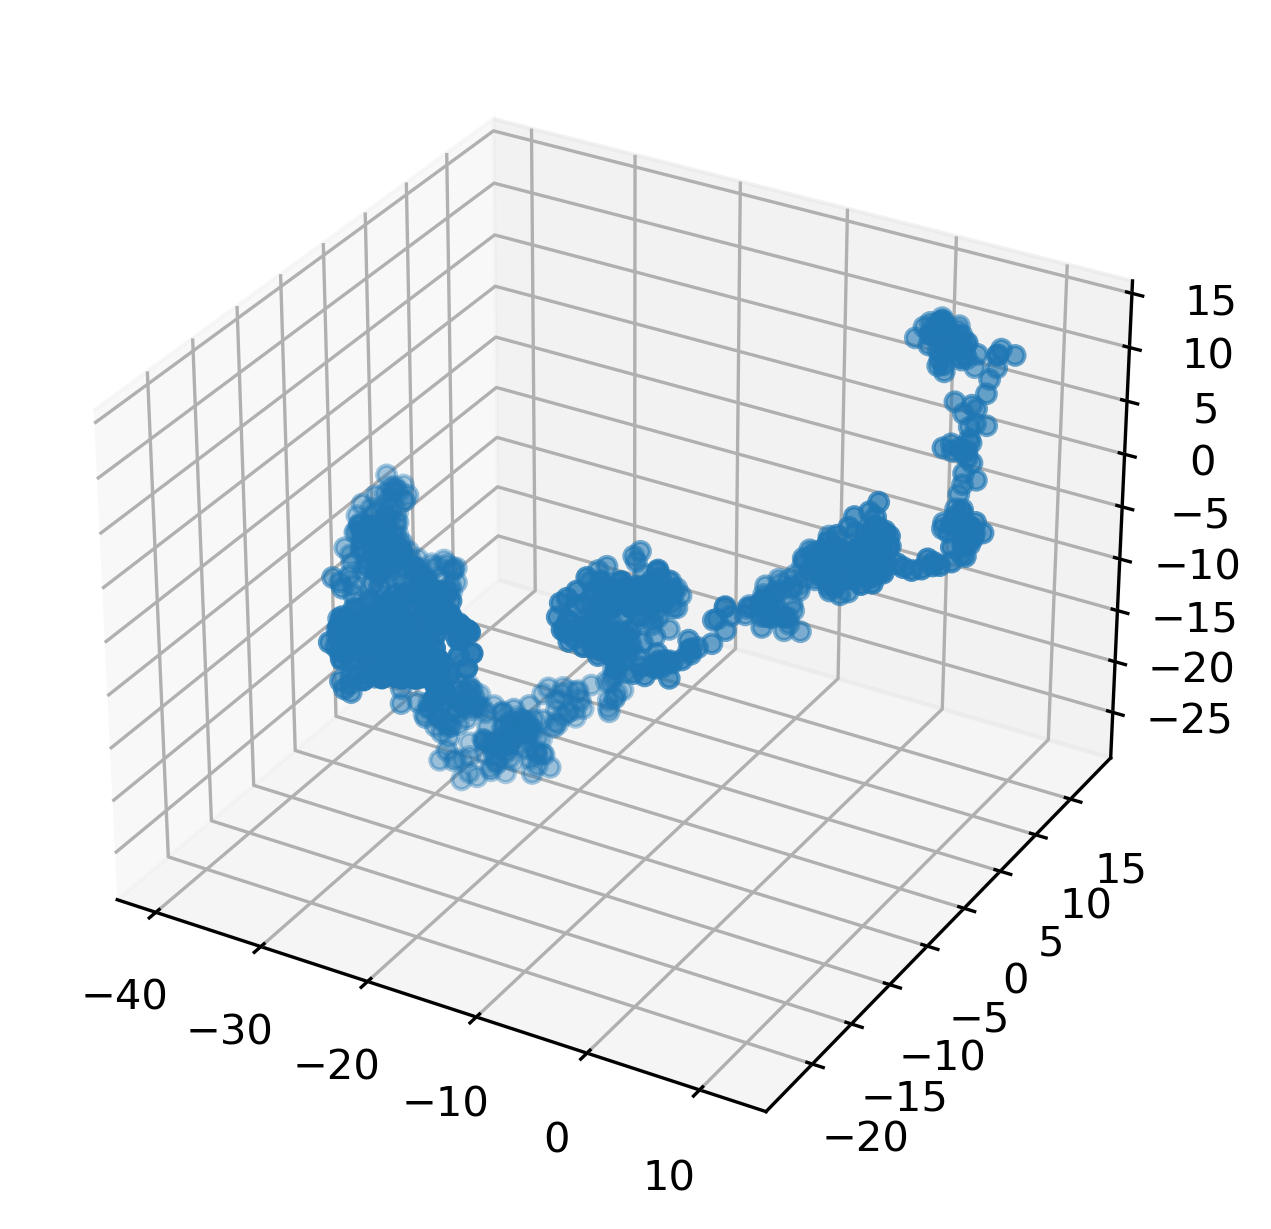

In [18]:
fig = plt.figure(figsize=(5,5), dpi=300)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:,0], pos[:,1], pos[:,2], 'o')

In [21]:
lef = Loop_Extruders(name='smc',num_LE=20, topology=generator.topology,
                     k_off=0.01, k_hop=0.1, kstep_LE=1.0, stepsize_LE=3.0,
                     sim3D=sim3D, tau=1e2)
print("3D hopping", lef.hop3D)
print("Preferential loading", lef.preferential_LE_loading)
print("Temperature", lef.temp)
# lef.update_immobile_blockers(boundaries)
lef.unbind_at_end = True

Random seed 22134009
Randomly distributing the LEFs
3D hopping False
Preferential loading 0.0
Temperature 0.0


In [22]:
sim1D = Extrusion_kinetics(lef)

Initialized extrusion kinetics with the random seed  87018


In [ ]:

def closest_lower_index(t, A):
    return max((i for i, x in enumerate(A) if x <= t), key=lambda i: A[i], default=None)

def add_new_LEFBonds(sim1D, sim3D, nsteps):
    anchor_locs = []
    activation_times = []
    leids = []
    for time_val in sorted(sim1D.lef.anchor_loc_dict.keys())[-nsteps-1:]:
        
        anchor_locs.append(sim1D.lef.anchor_loc_dict[time_val][0])
        activation_times.append(time_val)
        leids.append(sim1D.lef.anchor_loc_dict[time_val][1])
        # print(time_val,sim1D.lef.anchor_loc_dict[time_val] ,"yosemite")
    
    anchor_locs = np.array(anchor_locs, dtype=int)
    leids = np.array(leids, dtype=str)
    unique_anchor_locs = list(map(list, set(map(tuple, anchor_locs.reshape(-1,2)))))
    
    sim3D.force_field_manager.removeForce(sim3D.simulation.context, "LEFBonds")
    sim3D.force_field_manager.addLEFBonds(anchors=unique_anchor_locs)
    sim3D.simulation.context.reinitialize(preserveState=True)
    # sim3D.logger.info(f"Context reinitialized after adding force: {name}")

    
    # print(f"Total LEF bonds added: {sim3D.forceDict['LEFBond'].getNumBonds()}")
    # for bid in range(sim3D.forceDict["LEFBond"].getNumBonds()):
    #     params=sim3D.forceDict['LEFBond'].getBondParameters(bid)
    #     print('bond params', params)
    
    return anchor_locs, activation_times, leids
        
def activate_LEFBonds(sim3D, activated_anchors,kLE):
    
    num_LEFBonds = sim3D.force_field_manager.forceDict["LEFBonds"].getNumBonds()
    for bond_id in range(num_LEFBonds):
        particle1, particle2, _ = sim3D.force_field_manager.forceDict['LEFBonds'].getBondParameters(bond_id)
        k_LE_bond = 0.0
        for anchor1, anchor2 in activated_anchors:
            
            if anchor1==particle1 and anchor2==particle2: 
                # print('grand canyon', anchor1, anchor2, particle1, particle2)
                k_LE_bond = kLE
                
        sim3D.force_field_manager.forceDict['LEFBonds'].setBondParameters(bond_id, particle1, particle2, (1.0, k_LE_bond))
    sim3D.force_field_manager.forceDict['LEFBonds'].updateParametersInContext(sim3D.simulation.context)

def run_sim(sim3D, sim1D, lef, tstop, update_interval=10.0, verbose=False):

    anchor_loc_dict = {}
    
    resisting_force = []
    active_force = [[],[]]
    # matching time scales
    t1D_unit = 1 # second
    t3D_unit = 0.1 # second
    dt=0.01 # t3D
    blocksize = 500
    tblock = blocksize*dt*t3D_unit # second

    time3D = 0
    update_lag = 10 #num events before updating 3D sims
    update_lag_time = update_interval

    # temper_polymer(sim3D, blocksize=5000, dT=50.0)
    
    num_events_since_last_3D_update = 0
    time_since_last_3D_update = 0.0

    while time3D<tstop:
        sim1D.simulate(verbose=verbose)    
        num_events_since_last_3D_update += 1
        time_since_last_3D_update += sim1D.dt
        
        if time_since_last_3D_update // update_lag_time > 0.0:
        # if num_events_since_last_3D_update % update_lag == 0 and time3D<sim1D.time:
            print("\nUpdate 3D sims ...")
            anchor_locations, activation_times, leids = add_new_LEFBonds(sim1D, sim3D, num_events_since_last_3D_update)

            print('first step')
            assert anchor_locations.shape[0]==num_events_since_last_3D_update+1, f'shape mismatch!! {anchor_locations.shape,num_events_since_last_3D_update}'
                            
            activated_index = 0
            activate_LEFBonds(sim3D, anchor_locations[activated_index],kLE=lef.k_LE)
            print('second step')
            # print(anchor_locations.shape)
            #output the anchors
            # lef.output_anchor_locations(output)
            # lef.reset_LE_resisting_forces()
            
            for time_stamp in np.arange(time3D, sim1D.time, tblock):
                
                index_to_be_activated = closest_lower_index(time_stamp, activation_times)
                if index_to_be_activated is not None and index_to_be_activated != activated_index:
                    # if new_bonds_needed(anchor_locations[index_to_be_activated], anchor_locations[activated_index]):
                    if not np.array_equal(anchor_locations[index_to_be_activated], anchor_locations[activated_index]):
                        activate_LEFBonds(sim3D, anchor_locations[index_to_be_activated],kLE=lef.k_LE)
                        print(f" --> Activated 1D time point: {activation_times[index_to_be_activated]:<8.5f} | Current 3D time:{time3D:<8.5f}")
                        # print(anchor_locations[index_to_be_activated])
                    activated_index = index_to_be_activated
                    
                try:
                    sim3D.run(blocksize, report=True)
                    # sim3D.printForces()
                    # sim3D.saveStructure()
                    lef.update_LE_resisting_force(leids[activated_index], anchor_locations[activated_index])
                    
                    anchor_loc_dict[time_stamp] = anchor_locations[activated_index]
                    state = sim3D.simulation.context.getState(getPositions=True)
                    coords = state.getPositions(asNumpy=True)
                    resisting_force.append(sim1D.lef.loop_extruder_dict["LE_0"]['resisting_force'])
                    active_force[0].append(sim1D.lef.loop_extruder_dict["LE_0"]['active_force_left'])
                    active_force[1].append(sim1D.lef.loop_extruder_dict["LE_0"]['active_force_right'])
                    
                    # print(time3D, sim1D.time, time_stamp, anchor_locations[activated_index])
                    le_bond_distance=np.linalg.norm(coords[anchor_locations[activated_index][0][0]]-coords[anchor_locations[activated_index][0][1]])
                    # print(coords.shape, anchor_locations[activated_index])
                    print(f'LE_bond--{le_bond_distance}', anchor_locations[activated_index][0][0], anchor_locations[activated_index][0][1])
                except ():
                    sim3D.print_force_info()
                time3D += tblock
                
            num_events_since_last_3D_update = 0
            time_since_last_3D_update = 0.0
            # lef.update_LE_resisting_forces()
            print("\nRun 1D sims ...")
            

In [25]:
run_sim(sim3D, sim1D, lef, tstop=1e2, update_interval=100.0, verbose=1)
save_pdb(sim3D)

2025-05-16 19:43:40,227 | INFO | Forcefield | Removed LEFBonds from the system!
2025-05-16 19:43:40,229 | INFO | Forcefield | Adding 411 unique LEF bonds with r0=1.0, k=10.0, group=31
2025-05-16 19:43:40,229 | INFO | Forcefield | LEFBonds force successfully added to system.
2025-05-16 19:43:40,229 | INFO | Forcefield | --------------------------------------------------
2025-05-16 19:43:40,306 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,306 | INFO | ChromatinDynamics | Running simulation for 500 steps...


traverse_LE: dx=0.17451961922134046 | force=5.633709036997706 | fres=(-1.7048045753356444, -1.7048045753356444) | cutoff=0.9999677177559219, dt=0.031568147372585405, t_mesh=0.001
129.7611337083383 144.99468233300422
486.11815298267123 489.8505757612719
249.0229038054338 274.87497969256344
438.00801281007796 456.05306686215704
222.89156860494356 236.27000844370514
306.73288725524645 321.0756742236841
187.2748760670603 191.99988525539646
956.4130315651458 980.947034962209
157.00132847528295 183.17427569377404
531.6121480779412 554.1263139299788
643.964955315469 670.313552608083
868.8739984335655 889.3139064264816
869.0112897575767 887.3326652973399
145.00150701816096 156.99890607152093
591.1452129080322 623.1179896834892
855.010648394679 867.9930299552955
959.289888698255 963.9499508591852
848.0481313596665 854.999495484311
383.8148174887558 390.07001358152274
737 738
Time: 100.325717 |    LE_5    move_right_anchor    | dx_left: 0      | dx_right: 0     
Rate vector: [0.01 1.   1.   0.  

2025-05-16 19:43:40,409 | INFO | ChromatinDynamics | Completed 500 steps in 0.10s (4859 steps/s)
2025-05-16 19:43:40,410 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,411 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,412 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:40,472 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8325 steps/s)
2025-05-16 19:43:40,473 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,474 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,474 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.0774559610869272 129 144
LE_bond--0.9113832113876356 129 144


2025-05-16 19:43:40,645 | INFO | ChromatinDynamics | Completed 500 steps in 0.17s (2926 steps/s)
2025-05-16 19:43:40,654 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,691 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,696 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:40,779 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6857 steps/s)
2025-05-16 19:43:40,780 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,782 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,782 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:40,844 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8035 steps/s)
2025-05-16 19:43:40,845 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1235342887026518 129 144
LE_bond--1.4393813615262738 129 144
LE_bond--1.381854491607634 129 144


2025-05-16 19:43:40,910 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7916 steps/s)
2025-05-16 19:43:40,911 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,913 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,913 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:40,982 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7376 steps/s)
2025-05-16 19:43:40,982 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,984 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:40,984 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:41,049 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7737 steps/s)
2025-05-16 19:43:41,050 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1828576504465753 129 144
LE_bond--1.0850979845148103 129 144
LE_bond--1.3247681618766578 129 144


2025-05-16 19:43:41,120 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7450 steps/s)
2025-05-16 19:43:41,120 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,122 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,122 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:41,188 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7614 steps/s)
2025-05-16 19:43:41,189 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,190 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,191 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:41,265 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6725 steps/s)
2025-05-16 19:43:41,266 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1568327196450656 129 144
LE_bond--1.1875767177743224 129 144
LE_bond--0.9552265275674945 129 144


2025-05-16 19:43:41,347 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6346 steps/s)
2025-05-16 19:43:41,347 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,349 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,349 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:41,435 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5828 steps/s)
2025-05-16 19:43:41,436 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,438 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,439 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:41,510 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7024 steps/s)
2025-05-16 19:43:41,511 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3701493738744037 129 144
LE_bond--1.1975566797953534 129 144
LE_bond--1.285802656396382 129 144


2025-05-16 19:43:41,591 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6433 steps/s)
2025-05-16 19:43:41,592 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,593 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,593 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:41,663 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7223 steps/s)
2025-05-16 19:43:41,663 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,665 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,666 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:41,740 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6754 steps/s)
2025-05-16 19:43:41,741 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3406838344591223 129 144
LE_bond--1.0946227580536398 129 144
LE_bond--1.3101370998094477 129 144


2025-05-16 19:43:41,811 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7384 steps/s)
2025-05-16 19:43:41,811 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,813 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,814 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:41,885 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7064 steps/s)
2025-05-16 19:43:41,886 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,887 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:41,888 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:41,956 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7357 steps/s)
2025-05-16 19:43:41,956 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3316286947655185 129 144
LE_bond--1.1488917057866377 129 144
LE_bond--1.1639508736122324 129 144


2025-05-16 19:43:42,038 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6338 steps/s)
2025-05-16 19:43:42,038 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,040 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,040 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:42,117 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6604 steps/s)
2025-05-16 19:43:42,117 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,119 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,120 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:42,193 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6854 steps/s)
2025-05-16 19:43:42,193 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1118977971255202 129 144
LE_bond--1.1231901710447636 129 144
LE_bond--1.104256195840553 129 144


2025-05-16 19:43:42,261 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7586 steps/s)
2025-05-16 19:43:42,262 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,264 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,264 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:42,329 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7721 steps/s)
2025-05-16 19:43:42,329 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,331 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,331 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:42,393 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8198 steps/s)
2025-05-16 19:43:42,393 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1717565889953654 129 144
LE_bond--1.1264296396070463 129 144
LE_bond--1.1925620179680854 129 144
LE_bond--1.0374893956277849 129 144


2025-05-16 19:43:42,521 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8308 steps/s)
2025-05-16 19:43:42,522 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,523 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,524 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:42,592 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7324 steps/s)
2025-05-16 19:43:42,593 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,594 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,595 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:42,656 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8225 steps/s)
2025-05-16 19:43:42,656 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.07970184080959 129 144
LE_bond--1.3576891523186245 129 144
LE_bond--1.229788007245543 129 144


2025-05-16 19:43:42,726 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7419 steps/s)
2025-05-16 19:43:42,726 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,728 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,729 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:42,799 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7108 steps/s)
2025-05-16 19:43:42,800 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,802 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,802 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:42,876 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6812 steps/s)
2025-05-16 19:43:42,877 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3645886456054725 129 144
LE_bond--1.2862017167118307 129 144
LE_bond--1.3612772008230825 129 144


2025-05-16 19:43:42,980 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5280 steps/s)
2025-05-16 19:43:42,980 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,982 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:42,982 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:43,169 | INFO | ChromatinDynamics | Completed 500 steps in 0.19s (2672 steps/s)
2025-05-16 19:43:43,170 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,171 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,172 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.3582610455710793 129 144
LE_bond--1.446351786980189 129 144


2025-05-16 19:43:43,254 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6093 steps/s)
2025-05-16 19:43:43,255 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,256 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,257 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:43,336 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6340 steps/s)
2025-05-16 19:43:43,336 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,338 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,338 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:43,412 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6804 steps/s)
2025-05-16 19:43:43,413 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2087932816920917 129 144
LE_bond--1.095567649206898 129 144
LE_bond--1.179897360811304 129 144


2025-05-16 19:43:43,490 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6697 steps/s)
2025-05-16 19:43:43,490 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,492 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,493 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:43,564 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7012 steps/s)
2025-05-16 19:43:43,565 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,566 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,567 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:43,638 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7022 steps/s)
2025-05-16 19:43:43,639 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2778191823095368 129 144
LE_bond--1.088604313013798 129 144
LE_bond--1.0794522744776374 129 144


2025-05-16 19:43:43,715 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6727 steps/s)
2025-05-16 19:43:43,716 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,718 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,718 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:43,787 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7291 steps/s)
2025-05-16 19:43:43,788 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,789 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,790 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:43,862 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6896 steps/s)
2025-05-16 19:43:43,863 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.5017047523613112 129 144
LE_bond--1.1561729413274016 129 144
LE_bond--1.1967908461542112 129 144


2025-05-16 19:43:43,939 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6825 steps/s)
2025-05-16 19:43:43,939 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,941 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:43,942 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:44,023 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6196 steps/s)
2025-05-16 19:43:44,024 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,025 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,026 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:44,108 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6107 steps/s)
2025-05-16 19:43:44,109 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.241485782714703 129 144
LE_bond--1.1709524709136565 129 144
LE_bond--0.9043520376446932 129 144


2025-05-16 19:43:44,191 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6281 steps/s)
2025-05-16 19:43:44,191 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,193 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,193 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:44,271 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6481 steps/s)
2025-05-16 19:43:44,271 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,273 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,274 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:44,351 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6472 steps/s)
2025-05-16 19:43:44,352 | INFO | ChromatinDynamics | ----------------------

LE_bond--0.9407655954522408 129 144
LE_bond--1.234628904654032 129 144
LE_bond--1.1856645161057189 129 144


2025-05-16 19:43:44,438 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6001 steps/s)
2025-05-16 19:43:44,438 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,440 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,440 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:44,523 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6113 steps/s)
2025-05-16 19:43:44,523 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,525 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,525 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:44,606 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6216 steps/s)
2025-05-16 19:43:44,607 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2342325272357757 129 144
LE_bond--1.2229868207635652 129 144
LE_bond--1.4319679150395694 129 144


2025-05-16 19:43:44,683 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6854 steps/s)
2025-05-16 19:43:44,683 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,685 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,685 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:44,749 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7934 steps/s)
2025-05-16 19:43:44,749 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,751 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,751 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:44,815 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7943 steps/s)
2025-05-16 19:43:44,815 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1740426884926498 129 144
LE_bond--1.2079676377683308 129 144
LE_bond--1.3183256199346998 129 144
LE_bond--1.2928482010015085 129 144


2025-05-16 19:43:44,940 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8309 steps/s)
2025-05-16 19:43:44,941 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,942 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:44,943 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:45,019 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6615 steps/s)
2025-05-16 19:43:45,019 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,021 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,021 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:45,106 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (5891 steps/s)
2025-05-16 19:43:45,107 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3459801836936098 129 144
LE_bond--1.1922268411610337 129 144
LE_bond--0.982032646264947 129 144


2025-05-16 19:43:45,187 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6442 steps/s)
2025-05-16 19:43:45,188 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,189 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,190 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:45,253 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7950 steps/s)
2025-05-16 19:43:45,253 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,255 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,255 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:45,322 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7504 steps/s)
2025-05-16 19:43:45,323 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2136338688679698 129 144
LE_bond--1.074233174797648 129 144
LE_bond--1.2250605682392406 129 144


2025-05-16 19:43:45,390 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7696 steps/s)
2025-05-16 19:43:45,391 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,393 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,393 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:45,461 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7432 steps/s)
2025-05-16 19:43:45,461 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,463 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,463 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:45,534 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7116 steps/s)
2025-05-16 19:43:45,534 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.4146993461910429 129 144
LE_bond--1.2349626167811634 129 144
LE_bond--1.2361484553850037 129 144


2025-05-16 19:43:45,613 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6623 steps/s)
2025-05-16 19:43:45,613 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,621 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,622 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:45,789 | INFO | ChromatinDynamics | Completed 500 steps in 0.17s (3003 steps/s)
2025-05-16 19:43:45,790 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,791 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,792 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.4366860124076173 129 144
LE_bond--1.1486667404693147 129 144


2025-05-16 19:43:45,878 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5802 steps/s)
2025-05-16 19:43:45,879 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,880 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,881 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:45,954 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6857 steps/s)
2025-05-16 19:43:45,954 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,956 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:45,956 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:46,023 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7581 steps/s)
2025-05-16 19:43:46,023 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1162199638305916 129 144
LE_bond--1.5803274549620518 129 144
LE_bond--1.331605385261344 129 144


2025-05-16 19:43:46,090 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7701 steps/s)
2025-05-16 19:43:46,091 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,093 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,093 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:46,159 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7622 steps/s)
2025-05-16 19:43:46,159 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,161 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,161 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:46,227 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7590 steps/s)
2025-05-16 19:43:46,228 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1054221955572907 129 144
LE_bond--1.1744459900249993 129 144
LE_bond--1.1938117354111395 129 144


2025-05-16 19:43:46,293 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7949 steps/s)
2025-05-16 19:43:46,294 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,295 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,296 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:46,354 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8609 steps/s)
2025-05-16 19:43:46,355 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,356 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,357 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:46,423 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7631 steps/s)
2025-05-16 19:43:46,423 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2451792891145244 129 144
LE_bond--1.2583168947479837 129 144
LE_bond--1.6571530238291445 129 144
LE_bond--1.4313527032631688 129 144


2025-05-16 19:43:46,496 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:46,562 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7663 steps/s)
2025-05-16 19:43:46,562 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,564 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,564 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:46,627 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8056 steps/s)
2025-05-16 19:43:46,627 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,629 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,629 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:46,687 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (

LE_bond--1.2271407171626318 129 144
LE_bond--1.4374416510209822 129 144
LE_bond--1.1877494433330138 129 144
LE_bond--1.396124036801556 129 144


2025-05-16 19:43:46,814 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8116 steps/s)
2025-05-16 19:43:46,814 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,816 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,816 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:46,875 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8498 steps/s)
2025-05-16 19:43:46,876 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,878 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:46,878 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:46,938 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8352 steps/s)
2025-05-16 19:43:46,939 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3265651599517427 129 144
LE_bond--1.210300920094041 129 144
LE_bond--1.320992806746166 129 144
LE_bond--1.4135990631020574 129 144


2025-05-16 19:43:47,071 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7355 steps/s)
2025-05-16 19:43:47,072 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,074 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,074 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:47,148 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6824 steps/s)
2025-05-16 19:43:47,148 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,150 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,150 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:47,223 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6911 steps/s)
2025-05-16 19:43:47,223 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2830830662266448 129 144
LE_bond--1.3370258167444735 129 144
LE_bond--1.0324286151179811 129 144


2025-05-16 19:43:47,300 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6780 steps/s)
2025-05-16 19:43:47,300 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,302 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,302 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:47,373 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7090 steps/s)
2025-05-16 19:43:47,374 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,376 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,376 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:47,448 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6937 steps/s)
2025-05-16 19:43:47,449 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1406135836592826 129 144
LE_bond--1.1022864890104145 129 144
LE_bond--1.3217169282126986 129 144


2025-05-16 19:43:47,527 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6624 steps/s)
2025-05-16 19:43:47,527 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,529 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,529 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:47,602 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6908 steps/s)
2025-05-16 19:43:47,602 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,604 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,605 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:47,681 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6601 steps/s)
2025-05-16 19:43:47,681 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1818263398668432 129 144
LE_bond--1.231478466942828 129 144
LE_bond--1.3459897074693337 129 144


2025-05-16 19:43:47,750 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7498 steps/s)
2025-05-16 19:43:47,751 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,753 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,754 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:47,826 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6972 steps/s)
2025-05-16 19:43:47,826 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,828 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,828 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:47,902 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6798 steps/s)
2025-05-16 19:43:47,903 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3037576968662845 129 144
LE_bond--1.0411566501579965 129 144
LE_bond--1.1734742489958963 129 144


2025-05-16 19:43:47,984 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6375 steps/s)
2025-05-16 19:43:47,984 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,986 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:47,987 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:48,049 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8013 steps/s)
2025-05-16 19:43:48,050 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,052 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,052 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:48,123 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7129 steps/s)
2025-05-16 19:43:48,123 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.27416807590633 129 144
LE_bond--1.5646622414079745 129 144
LE_bond--1.1960763740676963 129 144


2025-05-16 19:43:48,196 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7106 steps/s)
2025-05-16 19:43:48,196 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,198 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,198 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:48,348 | INFO | ChromatinDynamics | Completed 500 steps in 0.15s (3358 steps/s)
2025-05-16 19:43:48,348 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,364 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,364 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--0.8487013839153372 129 144
LE_bond--1.2629939014352527 129 144


2025-05-16 19:43:48,438 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6881 steps/s)
2025-05-16 19:43:48,438 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,440 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,440 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:48,520 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6260 steps/s)
2025-05-16 19:43:48,521 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,523 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,523 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:48,601 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6464 steps/s)
2025-05-16 19:43:48,601 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1506177283229908 129 144
LE_bond--1.1637948438445702 129 144
LE_bond--1.43779666523652 129 144


2025-05-16 19:43:48,680 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6624 steps/s)
2025-05-16 19:43:48,681 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,682 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,683 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:48,745 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8055 steps/s)
2025-05-16 19:43:48,745 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,747 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,747 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:48,812 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7742 steps/s)
2025-05-16 19:43:48,813 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.0798075646594907 129 144
LE_bond--1.176589002849044 129 144
LE_bond--1.268100059234534 129 144
LE_bond--1.046756940646254 129 144


2025-05-16 19:43:48,940 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8173 steps/s)
2025-05-16 19:43:48,941 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,943 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:48,943 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:49,002 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8515 steps/s)
2025-05-16 19:43:49,002 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,004 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,004 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:49,067 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7965 steps/s)
2025-05-16 19:43:49,068 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.110255547487192 129 144
LE_bond--1.0849460751231066 129 144
LE_bond--1.4313629521778863 129 144
LE_bond--1.371356605521352 129 144


2025-05-16 19:43:49,196 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7917 steps/s)
2025-05-16 19:43:49,196 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,198 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,198 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:49,263 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7794 steps/s)
2025-05-16 19:43:49,263 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,265 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,265 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:49,338 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6885 steps/s)
2025-05-16 19:43:49,338 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1154830348488547 129 144
LE_bond--1.0236535072406623 129 144
LE_bond--1.1861723970558742 129 144


2025-05-16 19:43:49,423 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6082 steps/s)
2025-05-16 19:43:49,423 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,425 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,426 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:49,507 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6206 steps/s)
2025-05-16 19:43:49,507 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,509 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,509 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:49,585 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6578 steps/s)
2025-05-16 19:43:49,586 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3057006576677754 129 144
LE_bond--1.198690024046326 129 144
LE_bond--1.1929392725683583 129 144


2025-05-16 19:43:49,669 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6197 steps/s)
2025-05-16 19:43:49,669 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,672 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,672 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:49,747 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6652 steps/s)
2025-05-16 19:43:49,748 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,750 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,750 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:49,827 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6548 steps/s)
2025-05-16 19:43:49,827 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2075095512843426 129 144
LE_bond--1.1192670702103642 129 144
LE_bond--1.3877476026758706 129 144


2025-05-16 19:43:49,899 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7178 steps/s)
2025-05-16 19:43:49,900 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,902 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,902 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:49,976 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6846 steps/s)
2025-05-16 19:43:49,976 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,978 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:49,978 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:50,046 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7414 steps/s)
2025-05-16 19:43:50,046 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1987075109667564 129 144
LE_bond--1.2095787259380488 129 144
LE_bond--1.104443125867755 129 144


2025-05-16 19:43:50,127 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6356 steps/s)
2025-05-16 19:43:50,128 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,130 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,130 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:50,204 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6763 steps/s)
2025-05-16 19:43:50,204 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,206 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,207 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:50,283 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6592 steps/s)
2025-05-16 19:43:50,283 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3253035629306493 129 144
LE_bond--1.1910406523502606 129 144
LE_bond--1.2944072069379073 129 144


2025-05-16 19:43:50,376 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5516 steps/s)
2025-05-16 19:43:50,377 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,378 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,379 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:50,446 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7468 steps/s)
2025-05-16 19:43:50,447 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,448 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,448 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:50,511 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8061 steps/s)
2025-05-16 19:43:50,511 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3053605590535897 129 144
LE_bond--1.2901947400584777 129 144
LE_bond--1.231151086859848 129 144


2025-05-16 19:43:50,580 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,580 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:50,642 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8250 steps/s)
2025-05-16 19:43:50,642 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,644 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,644 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:50,709 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7683 steps/s)
2025-05-16 19:43:50,710 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,712 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,712 | INFO | ChromatinDynamics | Runni

LE_bond--1.3505122027813663 129 144
LE_bond--1.255910237585028 129 144
LE_bond--1.382963326527991 129 144


2025-05-16 19:43:50,780 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,783 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,783 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:50,963 | INFO | ChromatinDynamics | Completed 500 steps in 0.18s (2786 steps/s)
2025-05-16 19:43:50,971 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,973 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:50,974 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.447582652968192 129 144
LE_bond--1.456511134262387 129 144


2025-05-16 19:43:51,057 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6049 steps/s)
2025-05-16 19:43:51,057 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,059 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,059 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:51,114 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (9084 steps/s)
2025-05-16 19:43:51,115 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,117 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,117 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:51,172 | INFO | ChromatinDynamics | Completed 500 steps in 0.05s (9091 steps/s)
2025-05-16 19:43:51,173 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.248321702023926 129 144
LE_bond--1.2978562896636872 129 144
LE_bond--1.2270244914627977 129 144
LE_bond--1.2383137861889768 129 144


2025-05-16 19:43:51,298 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8314 steps/s)
2025-05-16 19:43:51,298 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,300 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,300 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:51,382 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6168 steps/s)
2025-05-16 19:43:51,382 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,384 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,384 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:51,464 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6336 steps/s)
2025-05-16 19:43:51,464 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.4359460318779542 129 144
LE_bond--1.2940724173725657 129 144
LE_bond--1.363001388690007 129 144


2025-05-16 19:43:51,548 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6123 steps/s)
2025-05-16 19:43:51,549 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,551 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,551 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:51,628 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6487 steps/s)
2025-05-16 19:43:51,629 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,631 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,631 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:51,711 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6272 steps/s)
2025-05-16 19:43:51,711 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3612683085781976 129 144
LE_bond--1.2904272046282206 129 144
LE_bond--0.9931149207143356 129 144


2025-05-16 19:43:51,792 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6405 steps/s)
2025-05-16 19:43:51,792 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,794 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,795 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:51,872 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6465 steps/s)
2025-05-16 19:43:51,873 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,874 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:51,875 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:51,946 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7096 steps/s)
2025-05-16 19:43:51,946 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3833082139581148 129 144
LE_bond--1.0805165791452274 129 144
LE_bond--0.9983472243803119 129 144


2025-05-16 19:43:52,025 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6533 steps/s)
2025-05-16 19:43:52,026 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,027 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,028 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:52,106 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6389 steps/s)
2025-05-16 19:43:52,107 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,109 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,109 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:52,178 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7269 steps/s)
2025-05-16 19:43:52,179 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2303499857719353 129 144
LE_bond--1.1056211322221705 129 144
LE_bond--1.2527862543958412 129 144


2025-05-16 19:43:52,255 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6767 steps/s)
2025-05-16 19:43:52,255 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,257 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,258 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:52,336 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6426 steps/s)
2025-05-16 19:43:52,336 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,338 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,339 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:52,414 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6662 steps/s)
2025-05-16 19:43:52,414 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.241067594399423 129 144
LE_bond--1.192129175088144 129 144
LE_bond--1.3129375361528632 129 144


2025-05-16 19:43:52,491 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6775 steps/s)
2025-05-16 19:43:52,491 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,493 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,494 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:52,554 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8265 steps/s)
2025-05-16 19:43:52,555 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,557 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,557 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:52,620 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8010 steps/s)
2025-05-16 19:43:52,620 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.220983574583473 129 144
LE_bond--1.3718930569868057 129 144
LE_bond--1.5874517028135033 129 144
LE_bond--1.2373426054551993 129 144


2025-05-16 19:43:52,756 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7628 steps/s)
2025-05-16 19:43:52,757 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,758 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,759 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:52,825 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7517 steps/s)
2025-05-16 19:43:52,826 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,828 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,828 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:52,896 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7429 steps/s)
2025-05-16 19:43:52,896 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.0577403229384534 129 144
LE_bond--1.0630581392212428 129 144
LE_bond--1.4371794190683729 129 144


2025-05-16 19:43:52,964 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7642 steps/s)
2025-05-16 19:43:52,964 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,966 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:52,966 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:53,044 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6440 steps/s)
2025-05-16 19:43:53,045 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,047 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,047 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:53,126 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6374 steps/s)
2025-05-16 19:43:53,127 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.197743072690914 129 144
LE_bond--1.1249788138304333 129 144
LE_bond--1.4653858837993117 129 144


2025-05-16 19:43:53,209 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6248 steps/s)
2025-05-16 19:43:53,210 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,212 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,212 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:53,286 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6829 steps/s)
2025-05-16 19:43:53,286 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,288 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,288 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:53,363 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6689 steps/s)
2025-05-16 19:43:53,364 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.323410365227861 129 144
LE_bond--1.3474786886079995 129 144
LE_bond--1.2602119348725167 129 144


2025-05-16 19:43:53,472 | INFO | ChromatinDynamics | Completed 500 steps in 0.11s (4732 steps/s)
2025-05-16 19:43:53,479 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,496 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,496 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:53,623 | INFO | ChromatinDynamics | Completed 500 steps in 0.13s (3957 steps/s)
2025-05-16 19:43:53,623 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,625 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,625 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:53,693 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7422 steps/s)
2025-05-16 19:43:53,693 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.4092917305437762 129 144
LE_bond--1.2892944270523894 129 144
LE_bond--1.1874547368192647 129 144


2025-05-16 19:43:53,765 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7252 steps/s)
2025-05-16 19:43:53,765 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,767 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,768 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:53,837 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7264 steps/s)
2025-05-16 19:43:53,837 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,839 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,839 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:53,906 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7539 steps/s)
2025-05-16 19:43:53,906 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1213702994004036 129 144
LE_bond--1.2097661302940996 129 144
LE_bond--1.2405747532204774 129 144


2025-05-16 19:43:53,968 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8430 steps/s)
2025-05-16 19:43:53,969 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,971 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:53,971 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:54,033 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8109 steps/s)
2025-05-16 19:43:54,034 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,035 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,036 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:54,093 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8769 steps/s)
2025-05-16 19:43:54,093 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.0862476542045088 129 144
LE_bond--1.0681659261987158 129 144
LE_bond--1.0332282903447236 129 144
LE_bond--1.3838410767210476 129 144


2025-05-16 19:43:54,235 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7048 steps/s)
2025-05-16 19:43:54,236 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,238 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,238 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:54,312 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6808 steps/s)
2025-05-16 19:43:54,312 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,314 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,315 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:54,382 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7493 steps/s)
2025-05-16 19:43:54,382 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.0277145294254217 129 144
LE_bond--1.2048018641572202 129 144
LE_bond--1.3417541699343203 129 144


2025-05-16 19:43:54,451 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7476 steps/s)
2025-05-16 19:43:54,452 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,454 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,455 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:54,515 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8424 steps/s)
2025-05-16 19:43:54,516 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,517 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,517 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:54,576 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8561 steps/s)
2025-05-16 19:43:54,577 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.4807345361473885 129 144
LE_bond--1.3254257226524864 129 144
LE_bond--1.2111594846515057 129 144


2025-05-16 19:43:54,658 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6413 steps/s)
2025-05-16 19:43:54,659 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,661 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,661 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:54,770 | INFO | ChromatinDynamics | Completed 500 steps in 0.11s (4609 steps/s)
2025-05-16 19:43:54,771 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,774 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,774 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:54,845 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7177 steps/s)
2025-05-16 19:43:54,846 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3208023990747593 129 144
LE_bond--1.319992780396367 129 144
LE_bond--1.22302845064231 129 144


2025-05-16 19:43:54,927 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6670 steps/s)
2025-05-16 19:43:54,927 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,929 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:54,929 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:54,999 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7130 steps/s)
2025-05-16 19:43:55,000 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,001 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,002 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:55,076 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6716 steps/s)
2025-05-16 19:43:55,077 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.342213124536874 129 144
LE_bond--1.202730051043794 129 144
LE_bond--1.3300491685333347 129 144


2025-05-16 19:43:55,152 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7056 steps/s)
2025-05-16 19:43:55,153 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,156 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,156 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:55,300 | INFO | ChromatinDynamics | Completed 500 steps in 0.14s (3491 steps/s)
2025-05-16 19:43:55,301 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,303 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,303 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.1191132407411677 129 144
LE_bond--1.1762039877389259 129 144


2025-05-16 19:43:55,372 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7368 steps/s)
2025-05-16 19:43:55,372 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,376 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,376 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:55,462 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (5944 steps/s)
2025-05-16 19:43:55,463 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,464 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,465 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:55,545 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6239 steps/s)
2025-05-16 19:43:55,546 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.295706613370687 129 144
LE_bond--1.4647653216800038 129 144
LE_bond--1.297904594891659 129 144


2025-05-16 19:43:55,675 | INFO | ChromatinDynamics | Completed 500 steps in 0.13s (3954 steps/s)
2025-05-16 19:43:55,675 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,677 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,678 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:55,777 | INFO | ChromatinDynamics | Completed 500 steps in 0.10s (5052 steps/s)
2025-05-16 19:43:55,778 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,779 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,780 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.2930214378427598 129 144
LE_bond--1.417792826446806 129 144


2025-05-16 19:43:55,896 | INFO | ChromatinDynamics | Completed 500 steps in 0.12s (4305 steps/s)
2025-05-16 19:43:55,897 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,899 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,900 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:55,995 | INFO | ChromatinDynamics | Completed 500 steps in 0.10s (5246 steps/s)
2025-05-16 19:43:55,996 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,997 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:55,998 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:56,070 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6964 steps/s)
2025-05-16 19:43:56,071 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3987726682376094 129 144
LE_bond--1.223562037972707 129 144
LE_bond--1.171554761812377 129 144
 --> Activated 1D time point: 100.49001 | Current 3D time:100.50000


2025-05-16 19:43:56,177 | INFO | ChromatinDynamics | Completed 500 steps in 0.10s (5215 steps/s)
2025-05-16 19:43:56,298 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:56,309 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:56,310 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:56,426 | INFO | ChromatinDynamics | Completed 500 steps in 0.11s (4358 steps/s)
2025-05-16 19:43:56,426 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:56,454 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:56,455 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.4631407990648795 129 144
 --> Activated 1D time point: 100.97859 | Current 3D time:101.00000
LE_bond--1.5894815676377068 129 144
 --> Activated 1D time point: 101.45873 | Current 3D time:101.50000


2025-05-16 19:43:56,538 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6051 steps/s)
2025-05-16 19:43:56,539 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:56,545 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:56,546 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:56,630 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (5984 steps/s)
2025-05-16 19:43:56,630 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:56,636 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:56,636 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:56,718 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6196 steps/s)
2025-05-16 19:43:56,718 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3483824918763954 129 144
 --> Activated 1D time point: 101.99531 | Current 3D time:102.00000
LE_bond--1.1267196978488987 129 144
 --> Activated 1D time point: 102.49296 | Current 3D time:102.50000
LE_bond--1.3221754536797603 129 144
 --> Activated 1D time point: 102.92597 | Current 3D time:103.00000


2025-05-16 19:43:56,799 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6657 steps/s)
2025-05-16 19:43:56,800 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:56,807 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:56,807 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:56,877 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7225 steps/s)
2025-05-16 19:43:56,877 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:56,887 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:56,887 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:56,986 | INFO | ChromatinDynamics | Completed 500 steps in 0.10s (5072 steps/s)
2025-05-16 19:43:56,987 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2646749923637373 129 144
 --> Activated 1D time point: 103.40672 | Current 3D time:103.50000
LE_bond--1.498201490129813 129 144
 --> Activated 1D time point: 103.99538 | Current 3D time:104.00000
LE_bond--1.585156234965773 129 144
 --> Activated 1D time point: 104.49953 | Current 3D time:104.50000


2025-05-16 19:43:57,086 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5546 steps/s)
2025-05-16 19:43:57,088 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,102 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,103 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:57,205 | INFO | ChromatinDynamics | Completed 500 steps in 0.10s (5042 steps/s)
2025-05-16 19:43:57,205 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,207 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,207 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:57,287 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6309 steps/s)
2025-05-16 19:43:57,287 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2851659481413615 129 144
 --> Activated 1D time point: 104.99372 | Current 3D time:105.00000
LE_bond--1.3261832803829214 129 144
LE_bond--1.2721002549942533 129 144
 --> Activated 1D time point: 105.99328 | Current 3D time:106.00000


2025-05-16 19:43:57,368 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6757 steps/s)
2025-05-16 19:43:57,369 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,375 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,375 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:57,437 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8094 steps/s)
2025-05-16 19:43:57,438 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,444 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,444 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:57,504 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8333 steps/s)
2025-05-16 19:43:57,505 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2970006206846028 129 144
 --> Activated 1D time point: 106.48631 | Current 3D time:106.50000
LE_bond--0.8422711318562558 128 144
 --> Activated 1D time point: 106.97009 | Current 3D time:107.00000
LE_bond--1.3831785205271852 128 144
 --> Activated 1D time point: 107.47601 | Current 3D time:107.50000
LE_bond--1.1181054114541975 128 144
 --> Activated 1D time point: 107.99897 | Current 3D time:108.00000


2025-05-16 19:43:57,636 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8203 steps/s)
2025-05-16 19:43:57,636 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,642 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,643 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:57,707 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7890 steps/s)
2025-05-16 19:43:57,707 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,713 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,714 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:57,779 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7757 steps/s)
2025-05-16 19:43:57,779 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1260107063668086 128 144
 --> Activated 1D time point: 108.47068 | Current 3D time:108.50000
LE_bond--1.2414386358232052 128 144
 --> Activated 1D time point: 108.96990 | Current 3D time:109.00000
LE_bond--1.1888407705156396 128 144
 --> Activated 1D time point: 109.42503 | Current 3D time:109.50000


2025-05-16 19:43:57,844 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,849 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,850 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:57,912 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8048 steps/s)
2025-05-16 19:43:57,912 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,918 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,918 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:57,981 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7998 steps/s)
2025-05-16 19:43:57,982 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:57,988 | INFO | ChromatinDynamics | -----

LE_bond--1.3480977257175615 128 144
 --> Activated 1D time point: 109.98118 | Current 3D time:110.00000
LE_bond--0.8665704923414614 128 144
 --> Activated 1D time point: 110.46559 | Current 3D time:110.50000
LE_bond--1.3186485744950198 128 144
 --> Activated 1D time point: 110.97721 | Current 3D time:111.00000


2025-05-16 19:43:58,066 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6438 steps/s)
2025-05-16 19:43:58,067 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,073 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,073 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:58,139 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7616 steps/s)
2025-05-16 19:43:58,140 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,142 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,142 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:58,213 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7108 steps/s)
2025-05-16 19:43:58,213 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.0172515262623878 128 144
 --> Activated 1D time point: 111.41934 | Current 3D time:111.50000
LE_bond--1.2603008440426893 128 144
LE_bond--1.2610283163914553 128 144
 --> Activated 1D time point: 112.46504 | Current 3D time:112.50000


2025-05-16 19:43:58,279 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8443 steps/s)
2025-05-16 19:43:58,280 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,286 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,287 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:58,353 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7546 steps/s)
2025-05-16 19:43:58,354 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,361 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,361 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:58,428 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7451 steps/s)
2025-05-16 19:43:58,429 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1279635638592014 128 144
 --> Activated 1D time point: 112.99916 | Current 3D time:113.00000
LE_bond--1.1277503924510088 128 144
 --> Activated 1D time point: 113.44606 | Current 3D time:113.50000
LE_bond--1.1498528325244894 128 144
 --> Activated 1D time point: 113.98298 | Current 3D time:114.00000


2025-05-16 19:43:58,494 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8774 steps/s)
2025-05-16 19:43:58,495 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,496 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,496 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:58,658 | INFO | ChromatinDynamics | Completed 500 steps in 0.16s (3093 steps/s)
2025-05-16 19:43:58,659 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,667 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,668 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.2314736531769246 128 144
LE_bond--1.6527944845352287 128 144
 --> Activated 1D time point: 114.91315 | Current 3D time:115.00000


2025-05-16 19:43:58,759 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5496 steps/s)
2025-05-16 19:43:58,760 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,766 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,766 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:58,839 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6967 steps/s)
2025-05-16 19:43:58,839 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,846 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:58,846 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:58,924 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6461 steps/s)
2025-05-16 19:43:58,924 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2391118113315662 128 144
 --> Activated 1D time point: 115.47841 | Current 3D time:115.50000
LE_bond--1.0969030869535576 127 144
 --> Activated 1D time point: 115.99297 | Current 3D time:116.00000
LE_bond--1.311911101841481 127 144
 --> Activated 1D time point: 116.40350 | Current 3D time:116.50000


2025-05-16 19:43:59,000 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7361 steps/s)
2025-05-16 19:43:59,001 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,008 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,008 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:59,073 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7735 steps/s)
2025-05-16 19:43:59,074 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,080 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,080 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:59,148 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7426 steps/s)
2025-05-16 19:43:59,148 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3035326839095884 127 144
 --> Activated 1D time point: 116.97301 | Current 3D time:117.00000
LE_bond--1.1966303422096194 127 144
 --> Activated 1D time point: 117.45693 | Current 3D time:117.50000
LE_bond--1.1353107935966475 127 144
 --> Activated 1D time point: 117.97431 | Current 3D time:118.00000


2025-05-16 19:43:59,233 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6497 steps/s)
2025-05-16 19:43:59,234 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,240 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,240 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:59,318 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6406 steps/s)
2025-05-16 19:43:59,319 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,326 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,326 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:59,403 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6499 steps/s)
2025-05-16 19:43:59,404 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1687410753594876 127 145
 --> Activated 1D time point: 118.48900 | Current 3D time:118.50000
LE_bond--1.420722031255396 127 145
 --> Activated 1D time point: 118.95867 | Current 3D time:119.00000
LE_bond--1.3384629281322677 127 145
 --> Activated 1D time point: 119.45288 | Current 3D time:119.50000


2025-05-16 19:43:59,485 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6778 steps/s)
2025-05-16 19:43:59,486 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,492 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,492 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:59,573 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6273 steps/s)
2025-05-16 19:43:59,573 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,580 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,580 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:59,660 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6303 steps/s)
2025-05-16 19:43:59,660 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2079699755195679 127 145
 --> Activated 1D time point: 119.98125 | Current 3D time:120.00000
LE_bond--1.4326233968576128 127 145
 --> Activated 1D time point: 120.48525 | Current 3D time:120.50000
LE_bond--1.1175903062880952 127 145
 --> Activated 1D time point: 120.96544 | Current 3D time:121.00000


2025-05-16 19:43:59,739 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7090 steps/s)
2025-05-16 19:43:59,740 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,746 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,746 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:59,817 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7061 steps/s)
2025-05-16 19:43:59,818 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,820 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,820 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:43:59,893 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6837 steps/s)
2025-05-16 19:43:59,894 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.4511766744799097 127 146
 --> Activated 1D time point: 121.46414 | Current 3D time:121.50000
LE_bond--1.3726068243265515 127 146
LE_bond--1.0932576189833878 127 146
 --> Activated 1D time point: 122.47816 | Current 3D time:122.50000


2025-05-16 19:43:59,972 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7117 steps/s)
2025-05-16 19:43:59,972 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,979 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:43:59,980 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:00,053 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6858 steps/s)
2025-05-16 19:44:00,053 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,059 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,059 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:00,134 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6721 steps/s)
2025-05-16 19:44:00,134 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.0877033043565871 127 146
 --> Activated 1D time point: 122.98424 | Current 3D time:123.00000
LE_bond--1.3281217636805835 127 146
 --> Activated 1D time point: 123.49014 | Current 3D time:123.50000
LE_bond--1.6089628068123942 127 146
 --> Activated 1D time point: 123.99017 | Current 3D time:124.00000


2025-05-16 19:44:00,219 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6423 steps/s)
2025-05-16 19:44:00,220 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,227 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,227 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:00,306 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6375 steps/s)
2025-05-16 19:44:00,306 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,313 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,313 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:00,399 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5831 steps/s)
2025-05-16 19:44:00,400 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3712471836573645 127 146
 --> Activated 1D time point: 124.44220 | Current 3D time:124.50000
LE_bond--1.1201541993223034 127 146
 --> Activated 1D time point: 124.96157 | Current 3D time:125.00000
LE_bond--1.1588452536375067 127 146
 --> Activated 1D time point: 125.49172 | Current 3D time:125.50000


2025-05-16 19:44:00,496 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5628 steps/s)
2025-05-16 19:44:00,496 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,502 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,503 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:00,653 | INFO | ChromatinDynamics | Completed 500 steps in 0.15s (3333 steps/s)
2025-05-16 19:44:00,654 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,655 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,656 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.4278461417433996 127 146
 --> Activated 1D time point: 125.99013 | Current 3D time:126.00000
LE_bond--1.3270127801114144 127 146


2025-05-16 19:44:00,749 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5380 steps/s)
2025-05-16 19:44:00,750 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,756 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,756 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:00,850 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5339 steps/s)
2025-05-16 19:44:00,850 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,857 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:00,857 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:00,935 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6451 steps/s)
2025-05-16 19:44:00,935 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1376626357699893 127 146
 --> Activated 1D time point: 126.99163 | Current 3D time:127.00000
LE_bond--1.220140760096437 127 146
 --> Activated 1D time point: 127.48435 | Current 3D time:127.50000
LE_bond--1.089261895100593 126 146
 --> Activated 1D time point: 127.98580 | Current 3D time:128.00000


2025-05-16 19:44:01,019 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6598 steps/s)
2025-05-16 19:44:01,019 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,026 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,027 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:01,101 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6754 steps/s)
2025-05-16 19:44:01,102 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,108 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,109 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:01,185 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6602 steps/s)
2025-05-16 19:44:01,185 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.023863553875799 126 146
 --> Activated 1D time point: 128.49075 | Current 3D time:128.50000
LE_bond--1.3136177556252333 126 146
 --> Activated 1D time point: 128.97904 | Current 3D time:129.00000
LE_bond--1.1880634917301076 126 146
 --> Activated 1D time point: 129.49644 | Current 3D time:129.50000


2025-05-16 19:44:01,268 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6620 steps/s)
2025-05-16 19:44:01,269 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,275 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,276 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:01,356 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6291 steps/s)
2025-05-16 19:44:01,356 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,358 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,358 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:01,437 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6386 steps/s)
2025-05-16 19:44:01,437 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1113282453844844 126 146
 --> Activated 1D time point: 129.94663 | Current 3D time:130.00000
LE_bond--1.084330465583322 126 146
LE_bond--1.5429956089020918 126 146
 --> Activated 1D time point: 130.95217 | Current 3D time:131.00000


2025-05-16 19:44:01,527 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6073 steps/s)
2025-05-16 19:44:01,528 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,534 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,535 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:01,615 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6234 steps/s)
2025-05-16 19:44:01,615 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,617 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,618 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:01,703 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5871 steps/s)
2025-05-16 19:44:01,704 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2636839211293875 126 146
 --> Activated 1D time point: 131.48504 | Current 3D time:131.50000
LE_bond--1.285849773088725 126 146
LE_bond--1.1189538543549122 126 146
 --> Activated 1D time point: 132.46043 | Current 3D time:132.50000


2025-05-16 19:44:01,792 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6165 steps/s)
2025-05-16 19:44:01,793 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,799 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,800 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:01,889 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5583 steps/s)
2025-05-16 19:44:01,890 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,897 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:01,897 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:01,984 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5791 steps/s)
2025-05-16 19:44:01,985 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2268538278551797 126 146
 --> Activated 1D time point: 132.97795 | Current 3D time:133.00000
LE_bond--1.0468862616379528 126 146
 --> Activated 1D time point: 133.45926 | Current 3D time:133.50000
LE_bond--1.1051968741152312 126 146
 --> Activated 1D time point: 133.97830 | Current 3D time:134.00000


2025-05-16 19:44:02,066 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6823 steps/s)
2025-05-16 19:44:02,066 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,073 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,074 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:02,148 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6780 steps/s)
2025-05-16 19:44:02,148 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,155 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,155 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:02,240 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (5956 steps/s)
2025-05-16 19:44:02,240 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.0880590897114781 126 146
 --> Activated 1D time point: 134.49666 | Current 3D time:134.50000
LE_bond--1.1054374838035406 126 146
 --> Activated 1D time point: 134.97909 | Current 3D time:135.00000
LE_bond--1.2148026191311678 125 146
 --> Activated 1D time point: 135.48140 | Current 3D time:135.50000


2025-05-16 19:44:02,314 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7589 steps/s)
2025-05-16 19:44:02,315 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,321 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,322 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:02,402 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6262 steps/s)
2025-05-16 19:44:02,402 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,409 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,409 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:02,491 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6169 steps/s)
2025-05-16 19:44:02,491 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1829697685712106 125 146
 --> Activated 1D time point: 135.99943 | Current 3D time:136.00000
LE_bond--1.4563471557549141 125 146
 --> Activated 1D time point: 136.41986 | Current 3D time:136.50000
LE_bond--1.1396857887058212 125 147
 --> Activated 1D time point: 136.92732 | Current 3D time:137.00000


2025-05-16 19:44:02,569 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7214 steps/s)
2025-05-16 19:44:02,570 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,577 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,577 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:02,742 | INFO | ChromatinDynamics | Completed 500 steps in 0.16s (3037 steps/s)
2025-05-16 19:44:02,743 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,764 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,765 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.1760199798979116 125 148
 --> Activated 1D time point: 137.48793 | Current 3D time:137.50000
LE_bond--1.3057102006241659 125 148
 --> Activated 1D time point: 137.99174 | Current 3D time:138.00000


2025-05-16 19:44:02,857 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5422 steps/s)
2025-05-16 19:44:02,858 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,864 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,864 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:02,917 | INFO | ChromatinDynamics | Completed 500 steps in 0.05s (9465 steps/s)
2025-05-16 19:44:02,918 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,924 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:02,925 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:02,985 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8340 steps/s)
2025-05-16 19:44:02,986 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.365043029781875 125 148
 --> Activated 1D time point: 138.48351 | Current 3D time:138.50000
LE_bond--1.5096965186411972 125 148
 --> Activated 1D time point: 138.93054 | Current 3D time:139.00000
LE_bond--1.3595026945670092 125 148
 --> Activated 1D time point: 139.49287 | Current 3D time:139.50000


2025-05-16 19:44:03,066 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6855 steps/s)
2025-05-16 19:44:03,067 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,073 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,073 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:03,149 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6655 steps/s)
2025-05-16 19:44:03,149 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,155 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,156 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:03,220 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7873 steps/s)
2025-05-16 19:44:03,220 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.129645003440193 125 148
 --> Activated 1D time point: 139.97378 | Current 3D time:140.00000
LE_bond--1.3082121753856657 125 148
 --> Activated 1D time point: 140.49336 | Current 3D time:140.50000
LE_bond--1.2120248774133575 125 148
 --> Activated 1D time point: 140.93191 | Current 3D time:141.00000


2025-05-16 19:44:03,303 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6640 steps/s)
2025-05-16 19:44:03,303 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,310 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,310 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:03,386 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6692 steps/s)
2025-05-16 19:44:03,386 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,392 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,393 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:03,478 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (5893 steps/s)
2025-05-16 19:44:03,478 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2713082047802426 125 148
 --> Activated 1D time point: 141.45898 | Current 3D time:141.50000
LE_bond--1.2771480583271615 125 148
 --> Activated 1D time point: 141.98319 | Current 3D time:142.00000
LE_bond--1.2223615231568072 538 540


2025-05-16 19:44:03,567 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5800 steps/s)
2025-05-16 19:44:03,568 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,574 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,574 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:03,663 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5634 steps/s)
2025-05-16 19:44:03,664 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,670 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,671 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:03,743 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6900 steps/s)
2025-05-16 19:44:03,744 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.160274013597805 538 540
 --> Activated 1D time point: 142.96981 | Current 3D time:143.00000
LE_bond--0.8154945578869874 538 540
 --> Activated 1D time point: 143.43829 | Current 3D time:143.50000
LE_bond--1.1723077503831738 538 540
 --> Activated 1D time point: 143.96331 | Current 3D time:144.00000


2025-05-16 19:44:03,818 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7534 steps/s)
2025-05-16 19:44:03,819 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,825 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,825 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:03,892 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7550 steps/s)
2025-05-16 19:44:03,893 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,899 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:03,900 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:03,972 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6953 steps/s)
2025-05-16 19:44:03,972 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2359846963045662 538 540
 --> Activated 1D time point: 144.49746 | Current 3D time:144.50000
LE_bond--1.4173601764739385 538 540
 --> Activated 1D time point: 144.99572 | Current 3D time:145.00000
LE_bond--1.6244396362643005 538 540
 --> Activated 1D time point: 145.45258 | Current 3D time:145.50000


2025-05-16 19:44:04,067 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5737 steps/s)
2025-05-16 19:44:04,068 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,070 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,070 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:04,149 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6376 steps/s)
2025-05-16 19:44:04,149 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,155 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,156 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:04,231 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6635 steps/s)
2025-05-16 19:44:04,232 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.0648125698021254 538 540
LE_bond--1.1865325797233732 538 540
 --> Activated 1D time point: 146.49573 | Current 3D time:146.50000
LE_bond--0.989748178433162 538 540
 --> Activated 1D time point: 146.99710 | Current 3D time:147.00000


2025-05-16 19:44:04,319 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6262 steps/s)
2025-05-16 19:44:04,320 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,322 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,322 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:04,397 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6740 steps/s)
2025-05-16 19:44:04,397 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,404 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,404 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:04,481 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6564 steps/s)
2025-05-16 19:44:04,481 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.4756847256482613 538 540
LE_bond--1.2114756260689117 538 540
 --> Activated 1D time point: 147.98407 | Current 3D time:148.00000
LE_bond--1.2745343535365663 538 540
 --> Activated 1D time point: 148.49275 | Current 3D time:148.50000


2025-05-16 19:44:04,555 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7508 steps/s)
2025-05-16 19:44:04,556 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,562 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,563 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:04,629 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7609 steps/s)
2025-05-16 19:44:04,629 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,636 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,636 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:04,699 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7902 steps/s)
2025-05-16 19:44:04,700 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2372701981380239 538 540
 --> Activated 1D time point: 148.93574 | Current 3D time:149.00000
LE_bond--1.180572670830845 538 540
 --> Activated 1D time point: 149.49002 | Current 3D time:149.50000
LE_bond--1.1883955918201676 538 540
 --> Activated 1D time point: 149.99425 | Current 3D time:150.00000


2025-05-16 19:44:04,774 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7521 steps/s)
2025-05-16 19:44:04,774 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,788 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,792 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:04,956 | INFO | ChromatinDynamics | Completed 500 steps in 0.16s (3132 steps/s)
2025-05-16 19:44:04,956 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,958 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:04,959 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.300257622547651 538 540
 --> Activated 1D time point: 150.49662 | Current 3D time:150.50000
LE_bond--0.8385648852746186 115 116


2025-05-16 19:44:05,029 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7093 steps/s)
2025-05-16 19:44:05,030 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,036 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,036 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:05,106 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7163 steps/s)
2025-05-16 19:44:05,107 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,114 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,114 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:05,184 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7209 steps/s)
2025-05-16 19:44:05,184 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2336328840587916 115 116
 --> Activated 1D time point: 151.48655 | Current 3D time:151.50000
LE_bond--1.047830209868002 115 116
 --> Activated 1D time point: 151.99475 | Current 3D time:152.00000
LE_bond--0.8863833474812824 115 116
 --> Activated 1D time point: 152.47487 | Current 3D time:152.50000


2025-05-16 19:44:05,267 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6628 steps/s)
2025-05-16 19:44:05,267 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,273 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,274 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:05,354 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6225 steps/s)
2025-05-16 19:44:05,355 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,356 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,357 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:05,442 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (5889 steps/s)
2025-05-16 19:44:05,442 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.4343667197304397 114 116
 --> Activated 1D time point: 152.99977 | Current 3D time:153.00000
LE_bond--1.2115993148839042 114 116
LE_bond--1.2030289185681322 114 116
 --> Activated 1D time point: 153.97736 | Current 3D time:154.00000


2025-05-16 19:44:05,526 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6561 steps/s)
2025-05-16 19:44:05,527 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,534 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,534 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:05,599 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7754 steps/s)
2025-05-16 19:44:05,599 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,606 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,606 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:05,669 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8069 steps/s)
2025-05-16 19:44:05,669 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1782403318356107 114 116
 --> Activated 1D time point: 154.49140 | Current 3D time:154.50000
LE_bond--1.1013403599385256 114 116
 --> Activated 1D time point: 154.98994 | Current 3D time:155.00000
LE_bond--1.2413794467724508 114 116
 --> Activated 1D time point: 155.48762 | Current 3D time:155.50000


2025-05-16 19:44:05,734 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8721 steps/s)
2025-05-16 19:44:05,734 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,736 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,737 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:05,791 | INFO | ChromatinDynamics | Completed 500 steps in 0.05s (9300 steps/s)
2025-05-16 19:44:05,791 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,798 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,798 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:05,860 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8045 steps/s)
2025-05-16 19:44:05,861 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.4100044333564103 114 116
LE_bond--1.1164068500115603 114 116
 --> Activated 1D time point: 156.44350 | Current 3D time:156.50000
LE_bond--1.4837987247329631 114 116
 --> Activated 1D time point: 156.99615 | Current 3D time:157.00000


2025-05-16 19:44:05,945 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:05,945 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:06,007 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8137 steps/s)
2025-05-16 19:44:06,007 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,014 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,014 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:06,086 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6984 steps/s)
2025-05-16 19:44:06,087 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,094 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,094 | INFO | ChromatinDynamics | Runni

LE_bond--1.4114208318985373 114 116
 --> Activated 1D time point: 157.49594 | Current 3D time:157.50000
LE_bond--1.310248749106294 114 116
 --> Activated 1D time point: 157.98824 | Current 3D time:158.00000
LE_bond--1.3186827918731097 114 116
 --> Activated 1D time point: 158.41473 | Current 3D time:158.50000


2025-05-16 19:44:06,162 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7411 steps/s)
2025-05-16 19:44:06,162 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,170 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,170 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:06,255 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (5896 steps/s)
2025-05-16 19:44:06,256 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,262 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,262 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:06,331 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7353 steps/s)
2025-05-16 19:44:06,331 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2531811340257553 114 116
 --> Activated 1D time point: 158.99281 | Current 3D time:159.00000
LE_bond--1.2703416527928728 114 117
 --> Activated 1D time point: 159.49664 | Current 3D time:159.50000
LE_bond--1.4904678133361533 114 117


2025-05-16 19:44:06,393 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8444 steps/s)
2025-05-16 19:44:06,394 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,399 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,400 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:06,454 | INFO | ChromatinDynamics | Completed 500 steps in 0.05s (9380 steps/s)
2025-05-16 19:44:06,454 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,460 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,461 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:06,521 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8397 steps/s)
2025-05-16 19:44:06,521 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2462125584383534 114 117
 --> Activated 1D time point: 160.49403 | Current 3D time:160.50000
LE_bond--1.059494195633733 114 117
 --> Activated 1D time point: 160.99666 | Current 3D time:161.00000
LE_bond--1.284856970620046 114 117
 --> Activated 1D time point: 161.48107 | Current 3D time:161.50000
LE_bond--1.3367562499879981 114 117
 --> Activated 1D time point: 161.99878 | Current 3D time:162.00000


2025-05-16 19:44:06,666 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7137 steps/s)
2025-05-16 19:44:06,666 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,672 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,673 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:06,788 | INFO | ChromatinDynamics | Completed 500 steps in 0.11s (4358 steps/s)
2025-05-16 19:44:06,790 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,815 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,815 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.232718129424425 114 117
 --> Activated 1D time point: 162.45058 | Current 3D time:162.50000
LE_bond--0.9897331919334456 114 117
 --> Activated 1D time point: 162.95178 | Current 3D time:163.00000


2025-05-16 19:44:06,889 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6830 steps/s)
2025-05-16 19:44:06,889 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,895 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,896 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:06,948 | INFO | ChromatinDynamics | Completed 500 steps in 0.05s (9536 steps/s)
2025-05-16 19:44:06,949 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,955 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:06,955 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:07,016 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8299 steps/s)
2025-05-16 19:44:07,016 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.409890768954141 114 117
 --> Activated 1D time point: 163.36824 | Current 3D time:163.50000
LE_bond--1.1993654895681416 113 117
 --> Activated 1D time point: 163.98526 | Current 3D time:164.00000
LE_bond--1.2647815771253073 113 117
 --> Activated 1D time point: 164.48262 | Current 3D time:164.50000
LE_bond--1.3326832777200774 113 117


2025-05-16 19:44:07,160 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6972 steps/s)
2025-05-16 19:44:07,161 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,167 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,168 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:07,247 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6300 steps/s)
2025-05-16 19:44:07,248 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,265 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,265 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:07,330 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7761 steps/s)
2025-05-16 19:44:07,331 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3325407445198068 113 117
 --> Activated 1D time point: 165.39096 | Current 3D time:165.50000
LE_bond--1.329890818330318 113 117
 --> Activated 1D time point: 165.95015 | Current 3D time:166.00000
LE_bond--1.2636278689157212 113 118
 --> Activated 1D time point: 166.44995 | Current 3D time:166.50000


2025-05-16 19:44:07,390 | INFO | ChromatinDynamics | Completed 500 steps in 0.05s (9443 steps/s)
2025-05-16 19:44:07,391 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,397 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,398 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:07,454 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8937 steps/s)
2025-05-16 19:44:07,455 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,461 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,461 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:07,517 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (9029 steps/s)
2025-05-16 19:44:07,517 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.203432382635758 113 118
 --> Activated 1D time point: 166.99620 | Current 3D time:167.00000
LE_bond--1.156922293484123 113 118
 --> Activated 1D time point: 167.48276 | Current 3D time:167.50000
LE_bond--1.2744437269554962 113 118
 --> Activated 1D time point: 167.97991 | Current 3D time:168.00000
LE_bond--0.9856091487386947 113 118
 --> Activated 1D time point: 168.47486 | Current 3D time:168.50000


2025-05-16 19:44:07,652 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (9035 steps/s)
2025-05-16 19:44:07,652 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,658 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,659 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:07,715 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8966 steps/s)
2025-05-16 19:44:07,715 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,721 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,722 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:07,776 | INFO | ChromatinDynamics | Completed 500 steps in 0.05s (9265 steps/s)
2025-05-16 19:44:07,776 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3103041885374782 113 118
 --> Activated 1D time point: 168.95800 | Current 3D time:169.00000
LE_bond--1.2887541570190943 113 118
 --> Activated 1D time point: 169.48324 | Current 3D time:169.50000
LE_bond--1.4817055250699218 112 118
 --> Activated 1D time point: 169.95601 | Current 3D time:170.00000


2025-05-16 19:44:07,863 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6218 steps/s)
2025-05-16 19:44:07,864 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,866 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,866 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:07,933 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7557 steps/s)
2025-05-16 19:44:07,933 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,939 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:07,939 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:07,995 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (9073 steps/s)
2025-05-16 19:44:07,995 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.4157445129536927 112 118
LE_bond--1.151868180935715 112 118
 --> Activated 1D time point: 170.99826 | Current 3D time:171.00000
LE_bond--1.358638295165716 112 118
LE_bond--0.9870800865442334 112 118
 --> Activated 1D time point: 171.92908 | Current 3D time:172.00000


2025-05-16 19:44:08,111 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8844 steps/s)
2025-05-16 19:44:08,111 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,117 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,117 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:08,172 | INFO | ChromatinDynamics | Completed 500 steps in 0.05s (9131 steps/s)
2025-05-16 19:44:08,173 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,179 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,179 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:08,260 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6177 steps/s)
2025-05-16 19:44:08,261 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3356449022551045 112 118
 --> Activated 1D time point: 172.45024 | Current 3D time:172.50000
LE_bond--1.0838376144241892 112 118
 --> Activated 1D time point: 172.99843 | Current 3D time:173.00000
LE_bond--1.3393190285116816 112 118
 --> Activated 1D time point: 173.42424 | Current 3D time:173.50000


2025-05-16 19:44:08,352 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (5984 steps/s)
2025-05-16 19:44:08,352 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,359 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,360 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:08,434 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6773 steps/s)
2025-05-16 19:44:08,434 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,440 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,441 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:08,502 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8223 steps/s)
2025-05-16 19:44:08,502 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1588470338675698 112 118
 --> Activated 1D time point: 173.99701 | Current 3D time:174.00000
LE_bond--1.1765552525259557 112 118
 --> Activated 1D time point: 174.48664 | Current 3D time:174.50000
LE_bond--1.102349395791434 112 119


2025-05-16 19:44:08,569 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7815 steps/s)
2025-05-16 19:44:08,570 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,583 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,585 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:08,743 | INFO | ChromatinDynamics | Completed 500 steps in 0.16s (3220 steps/s)
2025-05-16 19:44:08,743 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,750 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,751 | INFO | ChromatinDynamics | Running simulation for 500 steps...


LE_bond--1.043597013246846 112 119
 --> Activated 1D time point: 175.47123 | Current 3D time:175.50000
LE_bond--1.3043683871361993 112 119
 --> Activated 1D time point: 175.99604 | Current 3D time:176.00000


2025-05-16 19:44:08,818 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7399 steps/s)
2025-05-16 19:44:08,819 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,825 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,826 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:08,889 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7913 steps/s)
2025-05-16 19:44:08,889 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,891 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:08,892 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:08,960 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7328 steps/s)
2025-05-16 19:44:08,961 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2745014699513737 112 119
 --> Activated 1D time point: 176.47061 | Current 3D time:176.50000
LE_bond--1.305728133386004 112 119
LE_bond--1.0644117074797015 112 119
 --> Activated 1D time point: 177.47973 | Current 3D time:177.50000


2025-05-16 19:44:09,037 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7189 steps/s)
2025-05-16 19:44:09,038 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,040 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,040 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:09,120 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6298 steps/s)
2025-05-16 19:44:09,120 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,128 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,128 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:09,204 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6622 steps/s)
2025-05-16 19:44:09,204 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1716571613643267 111 119
LE_bond--1.097214861597421 111 119
 --> Activated 1D time point: 178.49884 | Current 3D time:178.50000
LE_bond--1.1419544385261484 111 119
 --> Activated 1D time point: 178.98146 | Current 3D time:179.00000


2025-05-16 19:44:09,270 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8513 steps/s)
2025-05-16 19:44:09,271 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,277 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,278 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:09,351 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6878 steps/s)
2025-05-16 19:44:09,351 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,357 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,358 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:09,442 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (5947 steps/s)
2025-05-16 19:44:09,443 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2442159539262378 111 119
 --> Activated 1D time point: 179.49963 | Current 3D time:179.50000
LE_bond--1.174423395138906 111 120
 --> Activated 1D time point: 179.98182 | Current 3D time:180.00000
LE_bond--1.4016258748831847 111 120
 --> Activated 1D time point: 180.41650 | Current 3D time:180.50000


2025-05-16 19:44:09,529 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6345 steps/s)
2025-05-16 19:44:09,529 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,536 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,537 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:09,606 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7210 steps/s)
2025-05-16 19:44:09,607 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,609 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,609 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:09,678 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7334 steps/s)
2025-05-16 19:44:09,678 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.259766021454933 111 120
 --> Activated 1D time point: 180.97444 | Current 3D time:181.00000
LE_bond--1.147693470289954 111 120
LE_bond--1.3457866016642952 111 120
 --> Activated 1D time point: 181.97654 | Current 3D time:182.00000


2025-05-16 19:44:09,756 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7138 steps/s)
2025-05-16 19:44:09,757 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,763 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,764 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:09,833 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7211 steps/s)
2025-05-16 19:44:09,834 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,836 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,836 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:09,910 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6806 steps/s)
2025-05-16 19:44:09,911 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.0074323395886424 110 120
 --> Activated 1D time point: 182.49059 | Current 3D time:182.50000
LE_bond--1.066310634859175 110 120
LE_bond--1.3340660070824821 110 120
 --> Activated 1D time point: 183.49914 | Current 3D time:183.50000


2025-05-16 19:44:09,991 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6833 steps/s)
2025-05-16 19:44:09,991 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,998 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:09,998 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:10,076 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6463 steps/s)
2025-05-16 19:44:10,076 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,083 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,084 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:10,162 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6400 steps/s)
2025-05-16 19:44:10,163 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1093424282422684 110 120
 --> Activated 1D time point: 183.99772 | Current 3D time:184.00000
LE_bond--1.2150469874382708 110 120
 --> Activated 1D time point: 184.48047 | Current 3D time:184.50000
LE_bond--1.0121384783245375 110 120
 --> Activated 1D time point: 184.99545 | Current 3D time:185.00000


2025-05-16 19:44:10,241 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7092 steps/s)
2025-05-16 19:44:10,242 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,248 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,249 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:10,318 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7193 steps/s)
2025-05-16 19:44:10,319 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,321 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,321 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:10,398 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6515 steps/s)
2025-05-16 19:44:10,399 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3304563936006206 110 120
 --> Activated 1D time point: 185.49018 | Current 3D time:185.50000
LE_bond--1.367914056177783 110 120
LE_bond--1.1169221681088708 110 120
 --> Activated 1D time point: 186.48871 | Current 3D time:186.50000


2025-05-16 19:44:10,479 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6875 steps/s)
2025-05-16 19:44:10,480 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,487 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,487 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:10,573 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5857 steps/s)
2025-05-16 19:44:10,573 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,579 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,580 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:10,665 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5859 steps/s)
2025-05-16 19:44:10,666 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.447977452093176 109 120
 --> Activated 1D time point: 186.97025 | Current 3D time:187.00000
LE_bond--1.2301112431527328 109 120
 --> Activated 1D time point: 187.49854 | Current 3D time:187.50000
LE_bond--1.1461155277817718 109 120
 --> Activated 1D time point: 187.96374 | Current 3D time:188.00000


2025-05-16 19:44:10,813 | INFO | ChromatinDynamics | Completed 500 steps in 0.14s (3612 steps/s)
2025-05-16 19:44:10,817 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,840 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,841 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:10,924 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6032 steps/s)
2025-05-16 19:44:10,924 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,931 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:10,931 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:10,988 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8747 steps/s)
2025-05-16 19:44:10,989 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.0731044575126945 109 120
 --> Activated 1D time point: 188.46869 | Current 3D time:188.50000
LE_bond--1.1408481540313982 109 120
 --> Activated 1D time point: 188.99707 | Current 3D time:189.00000
LE_bond--1.0509882896311287 109 121
 --> Activated 1D time point: 189.44089 | Current 3D time:189.50000


2025-05-16 19:44:11,056 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8426 steps/s)
2025-05-16 19:44:11,056 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,063 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,063 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:11,130 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7521 steps/s)
2025-05-16 19:44:11,130 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,137 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,137 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:11,211 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6762 steps/s)
2025-05-16 19:44:11,212 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.214193644789265 109 121
 --> Activated 1D time point: 189.97812 | Current 3D time:190.00000
LE_bond--1.1825090753048504 109 121
 --> Activated 1D time point: 190.47678 | Current 3D time:190.50000
LE_bond--1.2036582782682401 109 121
 --> Activated 1D time point: 190.98104 | Current 3D time:191.00000


2025-05-16 19:44:11,288 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7302 steps/s)
2025-05-16 19:44:11,288 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,295 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,296 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:11,358 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (8094 steps/s)
2025-05-16 19:44:11,358 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,365 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,365 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:11,438 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6912 steps/s)
2025-05-16 19:44:11,438 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2906195401209353 108 121
 --> Activated 1D time point: 191.49388 | Current 3D time:191.50000
LE_bond--1.5502763966978528 108 121
 --> Activated 1D time point: 191.93681 | Current 3D time:192.00000
LE_bond--1.1721392976929266 108 121
 --> Activated 1D time point: 192.49930 | Current 3D time:192.50000


2025-05-16 19:44:11,522 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6536 steps/s)
2025-05-16 19:44:11,522 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,529 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,530 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:11,612 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6080 steps/s)
2025-05-16 19:44:11,613 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,620 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,620 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:11,696 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6609 steps/s)
2025-05-16 19:44:11,696 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1989546993604152 108 121
 --> Activated 1D time point: 192.97264 | Current 3D time:193.00000
LE_bond--1.234172849969288 108 121
 --> Activated 1D time point: 193.48223 | Current 3D time:193.50000
LE_bond--1.5200447761734235 108 121
 --> Activated 1D time point: 193.99320 | Current 3D time:194.00000


2025-05-16 19:44:11,786 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6151 steps/s)
2025-05-16 19:44:11,786 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,792 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,793 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:11,865 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6923 steps/s)
2025-05-16 19:44:11,866 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,872 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:11,872 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:11,950 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6463 steps/s)
2025-05-16 19:44:11,950 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.1269002842323046 108 121
 --> Activated 1D time point: 194.49461 | Current 3D time:194.50000
LE_bond--1.1142796481963422 108 121
 --> Activated 1D time point: 194.97292 | Current 3D time:195.00000
LE_bond--1.4250510172923643 108 121
 --> Activated 1D time point: 195.49416 | Current 3D time:195.50000


2025-05-16 19:44:12,030 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6936 steps/s)
2025-05-16 19:44:12,030 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:12,037 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:12,038 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:12,118 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6257 steps/s)
2025-05-16 19:44:12,119 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:12,121 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:12,121 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:12,199 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6408 steps/s)
2025-05-16 19:44:12,200 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2108467686908713 107 121
 --> Activated 1D time point: 195.98351 | Current 3D time:196.00000
LE_bond--1.0129749698802042 107 122
LE_bond--1.3660105733508578 107 122
 --> Activated 1D time point: 196.94600 | Current 3D time:197.00000


2025-05-16 19:44:12,277 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7317 steps/s)
2025-05-16 19:44:12,277 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:12,284 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:12,284 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:12,349 | INFO | ChromatinDynamics | Completed 500 steps in 0.06s (7766 steps/s)
2025-05-16 19:44:12,349 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:12,356 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:12,357 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:12,428 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (7048 steps/s)
2025-05-16 19:44:12,428 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.2849431349695486 107 122
 --> Activated 1D time point: 197.48652 | Current 3D time:197.50000
LE_bond--1.0884632306033124 107 122
 --> Activated 1D time point: 197.98224 | Current 3D time:198.00000
LE_bond--1.0493836132929741 107 122


2025-05-16 19:44:12,504 | INFO | ChromatinDynamics | Completed 500 steps in 0.07s (6772 steps/s)
2025-05-16 19:44:12,505 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:12,512 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:12,512 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:12,588 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6642 steps/s)
2025-05-16 19:44:12,589 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:12,595 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-05-16 19:44:12,595 | INFO | ChromatinDynamics | Running simulation for 500 steps...
2025-05-16 19:44:12,672 | INFO | ChromatinDynamics | Completed 500 steps in 0.08s (6499 steps/s)
2025-05-16 19:44:12,673 | INFO | ChromatinDynamics | ----------------------

LE_bond--1.3270768691571377 107 122
 --> Activated 1D time point: 198.98848 | Current 3D time:199.00000
LE_bond--1.1141430533214354 107 122
 --> Activated 1D time point: 199.49419 | Current 3D time:199.50000
LE_bond--1.2885332509401775 107 122
 --> Activated 1D time point: 199.99596 | Current 3D time:200.00000


2025-05-16 19:44:12,769 | INFO | ChromatinDynamics | Completed 500 steps in 0.09s (5644 steps/s)
2025-05-16 19:44:12,769 | INFO | ChromatinDynamics | ------------------------------------------------------------


LE_bond--1.336154734644359 107 123

Run 1D sims ...


In [13]:
list(sim3D.simulation.context.getParameters())

['Ecut', 'k_rep', 'r_rep']

In [23]:
sim3D.force_field_manager.forceDict['LEFBonds'].getBondParameters(0)

[25, 36, (1.0, 1.0)]

In [31]:
num_LEFBonds = sim3D.force_field_manager.forceDict["LEFBonds"].getNumBonds()
for bond_id in range(num_LEFBonds):
    particle1, particle2, _ = sim3D.force_field_manager.forceDict['LEFBonds'].getBondParameters(bond_id)
    print(particle1, particle2, _)

6 47 (1.0, 0.0)
12 46 (1.0, 0.0)
2 49 (1.0, 0.0)
4 48 (1.0, 0.0)
12 45 (1.0, 0.0)
88 96 (1.0, 0.0)
10 46 (1.0, 0.0)
94 96 (1.0, 0.0)
4 47 (1.0, 0.0)
1 49 (1.0, 0.0)
2 48 (1.0, 0.0)
95 96 (1.0, 0.0)
5 6 (1.0, 0.0)
88 98 (1.0, 0.0)
1 51 (1.0, 0.0)
87 98 (1.0, 0.0)
10 47 (1.0, 0.0)
12 43 (1.0, 30.0)


In [23]:
sim3D.simulation.context.getState()

<openmm.openmm.State; proxy of <Swig Object of type 'OpenMM::State *' at 0x310944c90> >

In [16]:
True*100.0

100.0